<a href="https://colab.research.google.com/github/seungyoonnam/machine-learning/blob/main/%EA%B3%BC%EC%A0%9C_1_titanic_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/titanic/data

타이타닉 데이터 세트를 이용하여
- SGD 분류
- 결정트리
- 랜덤포레스트
- 히스토그램 기반 그래디언트 부스팅

모델을 만들고 최적화(기본값으로 모델 생성 후 최적화)

random state는 본인 학번으로 설정

- 평가요소
  - NaN(Not a Number, 결측값) 처리
  - 왜 이렇게 혼련 및 테스트세트를 만들었는가?
  - 수행한 최적화 방법을 단계별로 자세히 설명할것
  - 왜 이런 파라미터를 수정하는가?
  - 왜 이렇게 파라미터 범위를 정했는가?
  - 왜 이런 파라미터를 최종적으로 선택했는가?
- 추가요소
  - 평가요소 외 다양한 방법을 시도해볼 것
  - 특성공학 이용


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 전처리

###데이터 불러오기

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic/test.csv")
genderSub=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic/gender_submission.csv")

print(train.shape, test.shape, genderSub.shape)

(891, 12) (418, 11) (418, 2)


In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
genderSub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [58]:
# genderSub에서 'Survived' column만 선택
survived = genderSub['Survived']

# test dataframe에 'Survived' column을 index 1 위치에 추가
test.insert(1, 'Survived', survived)

test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
# train과 test를 행 방향으로 이어붙이기
titanic = pd.concat([train, test], ignore_index=True)

titanic.shape

(1309, 12)

<Axes: >

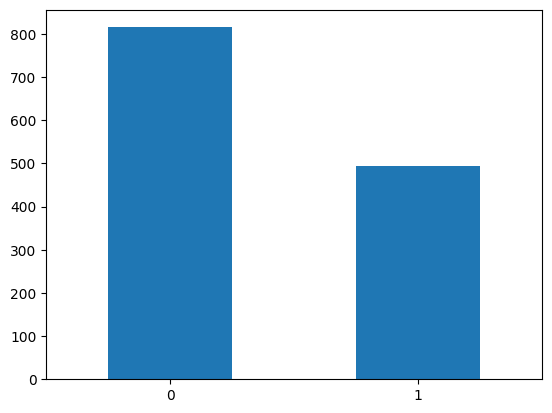

In [73]:
count_classes=pd.value_counts(titanic['Survived'], sort=True)
count_classes.plot(kind='bar', rot=0)

In [60]:
#불필요한 column drop
#식별용 Column인 'PassengerId', 'Name', 'Ticket'은 모두 제거한다.
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


###결측값 처리

In [61]:
#결측값 NaN
titanic.isna().sum()

Survived       0
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

결측값 처리
- Age: 나이. 평균값으로 보간
- Fare: 요금. 평균값으로 보간
- Cabin: Cabin num. 데이터의 대부분이 누락되어있다. column 자체를 삭제
- Embarked: 승선항구. 최빈값으로 보간한다.

  - C = Cherbourg, Q = Queenstown, S = Southampton.

In [62]:
# Age의 NaN 값을 median으로 보간
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Fare의 NaN 값을 median으로 보간
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

# Cabin column 삭제
titanic.drop('Cabin', axis=1, inplace=True)

# Embarked의 NaN 값을 most frequent value로 보간
most_frequent = titanic['Embarked'].mode()[0]
titanic['Embarked'].fillna(most_frequent, inplace=True)

#결측값 NaN 재검토
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

###Label Encoding
문자형 데이터들을 숫자형 데이터로 변환

In [63]:
# 문자열 column들을 원-핫 인코딩으로 변환
titanic = pd.get_dummies(titanic)

titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


###X-y, train-test 분리

In [64]:
# 'Survived'를 y로, 나머지를 X로 분리

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [65]:
from sklearn.model_selection import train_test_split
#훈련세트 테스트세트 분리
#stratify: 샘플링편향 방지
train_input, test_input, train_target, test_target = train_test_split(X, y, random_state=202135953, stratify=y)

###정규화

In [66]:
#데이터 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_input = ss.transform(train_input)
test_input = ss.transform(test_input)

#SGD

In [67]:
#기본 모델 생성 및 평가
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', random_state=202135953)

sc.fit(train_input, train_target)

print(sc.score(train_input, train_target))
print(sc.score(test_input, test_target))

0.8654434250764526
0.8292682926829268


최적화

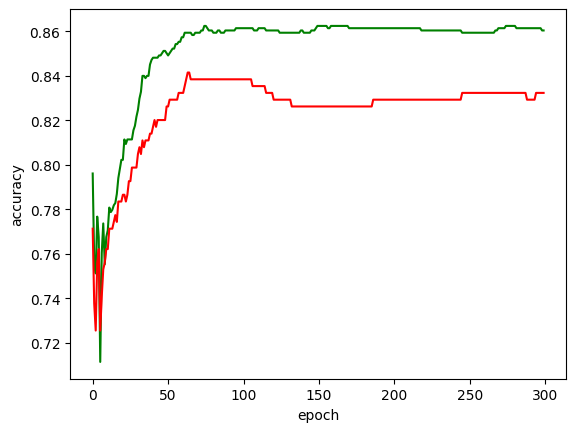

In [68]:
#epoch에 따른 test, train accuracy 확인
sc = SGDClassifier(loss='log_loss', random_state=202135953)


sgd_train_score=[]
sgd_test_score=[]

classes=np.unique(train_target)

for _ in range(0, 300):
  sc.partial_fit(train_input, train_target, classes=classes)
  sgd_train_score.append(sc.score(train_input, train_target))
  sgd_test_score.append(sc.score(test_input, test_target))

plt.plot(sgd_train_score, color='green')
plt.plot(sgd_test_score, color='red')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  #규제 방식
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1], #규제 강도. log scale로 지정
    'max_iter': [70, 80, 90, 100, 150, 200]   #최대 반복 횟수(epoch). 위 그래프에서 가장 변화가 격렬한 구간으로 설정
}

grid_search = GridSearchCV(sc, param_grid=param_grid)
grid_search.fit(train_input, train_target)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Best parameters:  {'alpha': 0.1, 'max_iter': 70, 'penalty': 'l2'}
Best cross-validation score:  0.8613488034807831


#Decision Tree

In [70]:
#기본모델 생성 및 평가
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=202135953)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9765545361875637
0.8262195121951219


In [72]:
#최적화
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],  # 작은 데이터셋에서도 자유롭게 분할할 수 있도록 작은 최소샘플도 지정
    'min_samples_leaf': [1, 3, 5],  # 기본값(1)이 작으므로 과적합에 유의해 더 큰 값도 시험해본다.
    'max_features': ['sqrt', None],
    'criterion': ['gini', 'entropy']
}

gs = GridSearchCV(dt, param_grid=param_grid)
gs.fit(train_input, train_target)

print("Best parameters: ", gs.best_params_)
print("Best cross-validation score: ", gs.best_score_)


Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score:  0.8756293380296281


#Random Forest

In [74]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=202135953)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9801221890029896
0.8369108049311095


In [80]:
#최적화

#하이퍼파라미터, 범위 지정
params = {
    'n_estimators': [100, 200, 300], # 앙상블된 트리의 개수가 클수록 성능향상
    'max_depth': [None, 5, 10, 20], # 과적합 경계한 작은 깊이 고려
    'min_samples_split': [2, 5, 10],  # 작은 데이터셋에서도 자유롭게 분할할 수 있도록 작은 최소샘플도 지정
    'min_samples_leaf': [1, 3],
    'criterion': ['gini', 'entropy']
          }

gs = GridSearchCV(RandomForestClassifier(random_state=202135953), params, n_jobs=-1)
gs.fit(train_input, train_target)

print("Best parameters: ", gs.best_params_)

rf = gs.best_estimator_
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.8944969452749252
0.8695224282606444


#Histogram Gradient Boosting

In [81]:
#기본모델
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=202135953)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.9574398804107631
0.8450533512897545


In [83]:
#최적화
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],  # 생성할 트리 개수. 기본값 100에서 과적합을 발생시키지 않는 한에서 더 좋은 성능을 위해 큰값 탐색
    'max_depth': [None, 3, 5, 10],
    'min_samples_leaf': [5, 10, 20, 40],  #기본값 20에 대해 섬세한 성능+과적합위험, 더 큰 값에서 시험
    'l2_regularization': [0.0, 0.1] # 기본값은 0(없음) 이나 정규화를 추가해 과적합 방지의 효과를 시험
}

gs = GridSearchCV(HistGradientBoostingClassifier(random_state=202135953), param_grid=param_grid)
gs.fit(train_input, train_target)
print("Best parameters: ", gs.best_params_)

hgb = gs.best_estimator_
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))


Best parameters:  {'l2_regularization': 0.0, 'learning_rate': 0.01, 'max_depth': 5, 'max_iter': 300, 'min_samples_leaf': 5}
0.9051992070713635
0.8766549259297628
